# **Handling Missing Data**

- Machine Learning models are not good with missing values. We always need to remove missing data.

- When our data has missing values, there are two options that we can do:
1.  The first way to handle missing values is, **Removing the row**. But this option should be less preferred because removing the entire row can lead to removal of important values as well.

2. The second way to handle missing data is to **impute them**. 
Imputing techniques are also of two types:  a) Univariate b) Multivariate

# Univariate and Multivariate

**Univariate:** Filling only one value at a time in only one column. There are different techniques in univariate depending on the missing data if it is Numerical or Categorical.

- If the missing data is Numerical, it can either be filled with mean/median , filled with some random value or can be filled with 'end of distribution value'.

- If the missing data is Categorical, it can either be filled with mode or simply write the word 'MISSING'.


The class that is given for Univariate data is **Simple Imputer**.

**Multivariate:** Filling more than one value at a time in multiple columns. Techniques for multivariate are **KNN Imputer Algorithm** and **Iterative Imputer** (which works on the algorithm MICE)


Note: Both KNN Imputer and Iterative Imputer are classes.


#1. Removing the Missing Data : CCA

The approach of removing the Missing Data is called **CCA** or **Complete Case Analysis.**

Complete Case Analysis is also called List-wise deletion of cases , consists in discarding observations(rows) where values in any of the variables(columns) are missing.

Complete Case Analysis means literally analyzing only those observations(rows) for which there is information in all of the variables(columns) in the dataset.



**Assumption for CCA:** Your data is missing completely at random.



   example: if there is a dataset of 1000 rows and 4 columns and one of them is 'Age', suppose it has 50 missing values. so, if we are using CCA, 50 rows will be removed and the shape of the dataset will become (950 , 4) . We will only remove these values if we are sure that these 50 values are randomly missing from the dataset, this is known as Missing Completely At Random (MCAR).

**Advantages and Disadvantages of CCA (Complete Case Analysis)**


**Advantages:**
- Easy to implement as no data manipulation required.
- Preserves variable(column) distribution, if data is MCAR then the distribution of the reduced dataset should match the distribution in the original dataset.

**Disadvantages:**
- It can exclude a large fraction of the original dataset(if the missing data is abundant).
- Excluded observations could be informative for the analysis (if the data is not missing at random)
- When using model in production(after deployment) , the model will not know how to handle missing data.

Note: Since the Disadvantages of CCA are more than advantages it is not prefered to used.

**When to use CCA (Complete Case Analysis) ?**
- MCAR: meaning the data should be missing completely at random.
- If the data is MCAR,then less than 5% of it should be missing.


# Code:  CCA(Complete Case Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/framingham-heart-study-dataset/framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.shape

(4240, 16)

**Inference**:  As we now know that CCA can be applied only if less than 5% of the data is missing from a column. In this dataset, CCA can be applied on Education , CigsPerDay , BPMeds , totChol , BMI , heartRate columns.

Fetching these 6 Null value columns

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [7]:
df[cols].sample(5)

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate
1654,NaN,20.0,0.0,168.0,23.08,75.0
316,1.0,20.0,0.0,260.0,21.05,85.0
22,1.0,0.0,0.0,234.0,34.17,70.0
1593,3.0,3.0,0.0,186.0,21.01,80.0
1547,4.0,0.0,0.0,182.0,20.02,90.0


Let us see if we drop the missing values, how much data will be left.


In [8]:
len(df[cols].dropna()) / len(df)

0.9408018867924528

94% data will be left after removal of null values.

In [9]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((4240, 16), (3989, 6))

**TIP:** If you have applied CCA on numerical data, then plot a Histogram for before applying CCA and after applying CCA, if both the distributions are comparable, then you're good to go.

Plotting a Histogram for old and new dataframe comparision.

<AxesSubplot:>

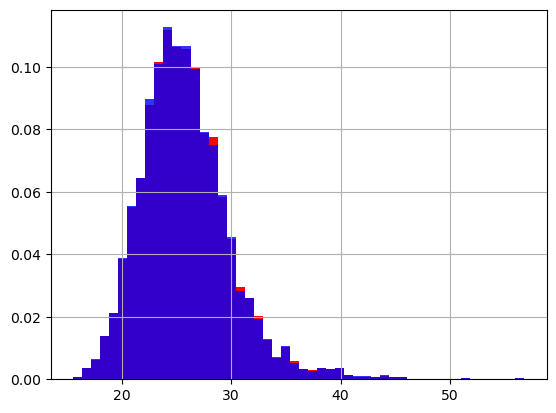

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['BMI'].hist(bins = 50, ax = ax, density = True , color = 'red')

#new data
new_df['BMI'].hist(bins = 50, ax = ax, density = True , color = 'blue' , alpha = 0.8)


**Inference:** Both the distributions overlap each other and they are comparable, we're cool with CCA :)

#2.Filling Missing Values:  Simple Imputer: Numerical Data

There are two approaches, Univariate imputer and Multivariate Imputer. 

We can fill these values through:


1.   Mean/Median
2.   Arbitary values
3.   end of distribution
4.   Random



# Mean/Median method

example: if we had column age and it has 2,3 numerical values and then missing values...in this case we can simply use mean/median of the column to fill the values. 

**When to use this method?**

When the data is missing completely at random and usage of this method is reliable if the missing data is less than 5%.

**When to use Mean and when to use Median?**

To answer this question, we need to look at the distribution of the data, if it is a Guassian distribution or bell distribution  or normally distributed we can use Mean. On the other hand if it is a Skewed distribution, then median of the data can be used.



**Disadvantages of using Mean/Median:**


1.   changes the distribution of the data
2.   adds extra outliers
3.   creates covarience(relation of that column with other columns) in the data




# Code: Mean/Median method

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [13]:
df2 = pd.read_csv('/kaggle/input/framingham-heart-study-dataset/framingham.csv')

In [14]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
columnss = [var for var in df2.columns if df2[var].isnull().mean() < 0.05 and df2[var].isnull().mean() > 0]
columnss

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [16]:
new = df2[columnss].sample(5)

In [17]:
df2[columnss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   4135 non-null   float64
 1   cigsPerDay  4211 non-null   float64
 2   BPMeds      4187 non-null   float64
 3   totChol     4190 non-null   float64
 4   BMI         4221 non-null   float64
 5   heartRate   4239 non-null   float64
dtypes: float64(6)
memory usage: 198.9 KB


In [18]:
df2[columnss].isnull().mean()

education     0.024764
cigsPerDay    0.006840
BPMeds        0.012500
totChol       0.011792
BMI           0.004481
heartRate     0.000236
dtype: float64

In [19]:
x = df2[columnss].drop(columns=['BMI'])
y = df2[columnss]['BMI']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
x_train.shape , x_test.shape

((3392, 5), (848, 5))

In [22]:
x_train.isnull().mean()

education     0.025354
cigsPerDay    0.006781
BPMeds        0.012677
totChol       0.012677
heartRate     0.000000
dtype: float64

In [23]:
mean_education = x_train['education'].mean()
median_education = x_train['education'].median()

mean_cigsPerDay = x_train['cigsPerDay'].mean()
median_cigsPerDay = x_train['cigsPerDay'].median()

In [24]:
x_train['education_mean']= x_train['education'].fillna(mean_education)
x_train['education_median'] = x_train['education'].fillna(median_education)

x_train['cigsPerDay_mean'] = x_train['cigsPerDay'].fillna(mean_cigsPerDay)
x_train['cigsPerDay_median'] = x_train['cigsPerDay'].fillna(median_cigsPerDay)

In [25]:
x_train.sample(5)

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
209,2.0,30.0,0.0,185.0,96.0,2.000000,2.0,30.0,30.0
289,4.0,30.0,0.0,155.0,50.0,4.000000,4.0,30.0,30.0
2518,NaN,0.0,0.0,246.0,69.0,1.987901,2.0,0.0,0.0
446,1.0,0.0,0.0,182.0,65.0,1.000000,1.0,0.0,0.0
154,3.0,3.0,1.0,NaN,98.0,3.000000,3.0,3.0,3.0


Checking for variance after filling values

In [26]:
print('original education variance: ',x_train['education'].var())
print('education variance after mean: ',x_train['education_mean'].var())
print('education variance after median: ',x_train['education_median'].var())

print('original CigsPerDay variance: ',x_train['cigsPerDay'].var())
print('CigsPerDay variance after mean: ',x_train['cigsPerDay'].var())
print('CigsPerDay variance after median: ',x_train['cigsPerDay'].var())

original education variance:  1.041305909669578
education variance after mean:  1.0148970897841212
education variance after median:  1.0149007083122359
original CigsPerDay variance:  139.88760805697325
CigsPerDay variance after mean:  139.88760805697325
CigsPerDay variance after median:  139.88760805697325


**Inference:** We see that after using Mean/Median Simple Imputation on Numerical data, the variance of the data shrinks.

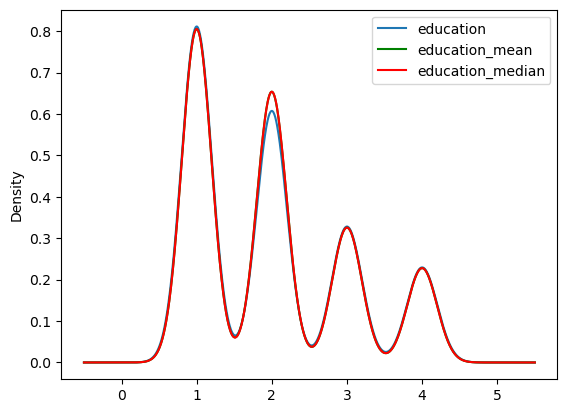

In [27]:
#Education

fig = plt.figure()
ax = fig.add_subplot(111)

#original
x_train['education'].plot(kind = 'kde', ax=ax)

#mean
x_train['education_mean'].plot(kind = 'kde', ax=ax, color = 'green' )

#median
x_train['education_median'].plot(kind = 'kde', ax=ax, color = 'red' )

#add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

                        

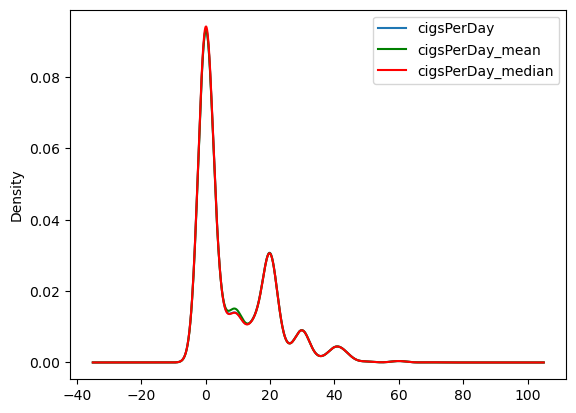

In [28]:
#Cigeretes per day

fig = plt.figure()
ax = fig.add_subplot(111)

#original
x_train['cigsPerDay'].plot(kind = 'kde', ax=ax)

#mean
x_train['cigsPerDay_mean'].plot(kind = 'kde', ax=ax, color = 'green' )

#median
x_train['cigsPerDay_median'].plot(kind = 'kde', ax=ax, color = 'red' )

#add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

In [29]:
x_train.cov()          #for covariance

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
education,1.041306,0.149084,0.000950,-1.282205,-0.819853,1.041306,1.041306,0.148080,0.144686
cigsPerDay,0.149084,139.887608,-0.082887,-16.643974,10.999415,0.145310,0.144951,139.887608,139.887608
BPMeds,0.000950,-0.082887,0.028977,0.564144,0.032353,0.000926,0.000927,-0.082318,-0.080501
totChol,-1.282205,-16.643974,0.564144,1928.469020,49.237339,-1.249711,-1.249353,-16.528433,-16.921240
heartRate,-0.819853,10.999415,0.032353,49.237339,146.287663,-0.799060,-0.799656,10.924810,10.708862
education_mean,1.041306,0.145310,0.000926,-1.249711,-0.799060,1.014897,1.014897,0.144325,0.141017
education_median,1.041306,0.144951,0.000927,-1.249353,-0.799656,1.014897,1.014901,0.143968,0.140647
cigsPerDay_mean,0.148080,139.887608,-0.082318,-16.528433,10.924810,0.144325,0.143968,138.938798,138.938798
cigsPerDay_median,0.144686,139.887608,-0.080501,-16.921240,10.708862,0.141017,0.140647,138.938798,139.467435


In [30]:
x_train.corr()       #for correlation

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
education,1.000000,0.012349,0.005483,-0.028934,-0.066289,1.000000,1.000000,0.012310,0.012005
cigsPerDay,0.012349,1.000000,-0.041079,-0.032089,0.076900,0.012191,0.012161,1.000000,1.000000
BPMeds,0.005483,-0.041079,1.000000,0.076124,0.015678,0.005400,0.005409,-0.041075,-0.040091
totChol,-0.028934,-0.032089,0.076124,1.000000,0.092575,-0.028204,-0.028195,-0.031958,-0.032655
heartRate,-0.066289,0.076900,0.015678,0.092575,1.000000,-0.065579,-0.065628,0.076630,0.074973
education_mean,1.000000,0.012191,0.005400,-0.028204,-0.065579,1.000000,0.999998,0.012154,0.011853
education_median,1.000000,0.012161,0.005409,-0.028195,-0.065628,0.999998,1.000000,0.012124,0.011822
cigsPerDay_mean,0.012310,1.000000,-0.041075,-0.031958,0.076630,0.012154,0.012124,1.000000,0.998103
cigsPerDay_median,0.012005,1.000000,-0.040091,-0.032655,0.074973,0.011853,0.011822,0.998103,1.000000


# 3. Filling Missing Values: Simple Imputer: Categorical Data

Here, there are basically 2 ways of filling missing values:


1.   filling the most frequent value
2.   creating a separate column as missing



So if the data is Missing Completely At Random(MCAR) and the missing data is less than 5% then we can either use i) **Mean/Median method** or ii) Mode method

**When to use Mode and when to make a missing column?**

Answer to this question is, when the missing data is less than 5% we use Mode to fill the missing values and the missing data is more than 10% we need to make a separate column for missing data.

# 4. Random Value Imputation

In this type of imputation, we randomly select the values from the missing data and fill it in the missing values

**Benifits:**

1.   Simple to use
2.   The distribution of the data remains the same
3.   preserves the variance of the variable.



**Disadvantages:**

1.   It disturbes the covariance of the data
2.   Heavy on memory
3.   Does not works the best with Decision Tree based algorithms because of inducing randomness in the data.






# 5.Filling Missing Values: Multivariate Imputation : KNN Imputer

In Multivariate Imputation, we use other rows and columns to fill the missing values in a column. So, there are two approaches for multivariate imputation 1) **KNN imputer** and 2) **Iterative imputer**

**KNN imputer**: It works on the algorithm called K Nearest Neighbour.

The whole idea is you would fill in the missing value from the row which is the most similar to it.

**Steps of working:**


1.   Find the K Nearest Neighbour - We take the sum of all the neighbours and divide it by the number of neighbours.
2.   Find the Value - take value from every neighbour and calculate the mean from it.



**Advantages:**

1.   This is a more accurate method.
2.   Its very good to work with for small and medium sized datasets.

**Disadvanatages:**

1.   More number of calculations
2.   When deploying, need to upload the whole X train set, so consumes a lot of memory. 





# Code: KNN Imputer

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
df3 = pd.read_csv('/kaggle/input/framingham-heart-study-dataset/framingham.csv')

In [33]:
columnss = [var for var in df3.columns if df3[var].isnull().mean() < 0.05 and df3[var].isnull().mean() > 0]
columnss

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [34]:
df3[columnss].sample(5)

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate
3032,1.0,10.0,0.0,310.0,20.52,52.0
1571,1.0,0.0,0.0,219.0,24.05,58.0
2301,1.0,0.0,0.0,180.0,26.32,95.0
1131,2.0,0.0,0.0,215.0,24.56,58.0
3476,2.0,0.0,0.0,165.0,26.79,75.0


In [35]:
df3[columnss].isnull().mean()*100

education     2.476415
cigsPerDay    0.683962
BPMeds        1.250000
totChol       1.179245
BMI           0.448113
heartRate     0.023585
dtype: float64

In [36]:
x = df3[columnss].drop(columns = ['BMI'])
y = df3[columnss]['BMI']

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
x_train.head()

,education,cigsPerDay,BPMeds,totChol,heartRate
839,1.0,0.0,0.0,244.0,75.0
4078,1.0,0.0,0.0,214.0,78.0
180,1.0,0.0,0.0,300.0,81.0
3399,4.0,0.0,0.0,288.0,68.0
221,2.0,9.0,0.0,180.0,85.0


In [39]:
knn = KNNImputer(n_neighbors = 3)

x_train_trf = knn.fit_transform(x_train)
x_test_trf = knn.transform(x_test)

In [40]:
pd.DataFrame(x_train_trf, columns= x_train.columns)

,education,cigsPerDay,BPMeds,totChol,heartRate
0,1.0,0.0,0.0,244.0,75.0
1,1.0,0.0,0.0,214.0,78.0
2,1.0,0.0,0.0,300.0,81.0
3,4.0,0.0,0.0,288.0,68.0
4,2.0,9.0,0.0,180.0,85.0
...,...,...,...,...,...
3387,2.0,0.0,0.0,200.0,75.0
3388,1.0,5.0,0.0,279.0,67.0
3389,1.0,0.0,0.0,211.0,60.0
3390,4.0,0.0,0.0,189.0,75.0


**Inference:** In this dataframe all the missing values have been imputed using KNN imputer.

In [41]:
#comparision with Simple Imputer --> mean
 
si = SimpleImputer()

x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)

## 6.Filling Missing Values: Multivariate Imputation : Iterative Imputer

Iterative Imputer also known as MICE(Multivariate Imputation by Chained Equations)

**Assumptions:** So we have 3 types of Missing Data:

*   MCAR : Missing Completely At Random
*   MAR : Missing At Random
*   MNAR : Missing Not At Random

It is an assumption that technique works the best with **MAR : Missing At Random**.

**Advantages:**

1.   Accurate


**Disadvantages:**

1.   Slow
2.   deploy the entire training set on server.





**How it works:**

Step 1 : Fill the missing values by using their mean. Replacing the missing values filled by mean to NaN. Why? to predict these values.

Step 2 : Moving left to right, remove all col1 missing values, predict the missing values of col1 using other cols.

Step 3 : remove all col2 missing values, predict the missing values of col2 using other cols.

Step 4 : Remove all col3 values and goes on..

**Iterations:**

Iteration 0: all mean values

Iteration 1: subtract Iteration1 - Iteration0 and goes on...

Difference table: we get a difference table after subtraction.